## Laboratorio 8 - clasificación con redes neuronales

## Nicolás Echeverri Rojas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


import matplotlib
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
colors=["#c501e2","#1eff05","#ff0534","#2ef8a0","#c6e602","01c4e7", "#f82d97"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=colors) 


import h5py

## 1. Carga de datos

In [2]:
data_train= "train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
 
data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [3]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [4]:
# Read the data
xtrain_classes, X_train, y_train =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, X_test,y_test =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

y_train = np.array(y_train)

y_test = np.array(y_test)

In [5]:
test_classes[:]

array([b'non-cat', b'cat'], dtype='|S7')

In [6]:
np.shape(X_train)

(209, 64, 64, 3)

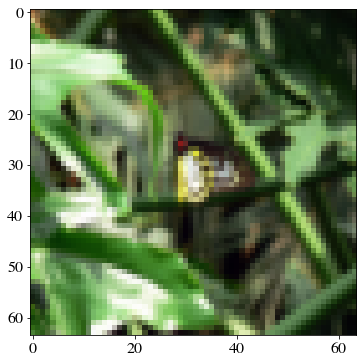

In [7]:
plt.imshow(X_train[198])

## 2. Escalamiento y aplanamiento de datos

In [8]:
X_train = np.reshape(X_train,(209, 64*64*3))/255
X_test  = np.reshape(X_test,(50, 64*64*3))/255

In [9]:
X_train.shape

(209, 12288)

In [10]:
type(y_train)

numpy.ndarray

## 3. Entrenamiento de la red neuronal

In [11]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [12]:
tf.random.set_seed(1234)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [90]:
model = Sequential([InputLayer(input_shape=(12288,)),
                    Dense(units= 10, activation='relu', kernel_regularizer = L2(0.8) ),
                    Dense(units = 1 , activation='sigmoid')]
  )

In [91]:
model.compile(optimizer=Adam(learning_rate=0.00005) ,loss=BinaryCrossentropy(), metrics=['accuracy'] )

In [93]:
myhistory=model.fit(X_train, y_train, epochs=200, 
                    batch_size=16, validation_split=0.1,
                    verbose=0)

(0.0, 1.0)

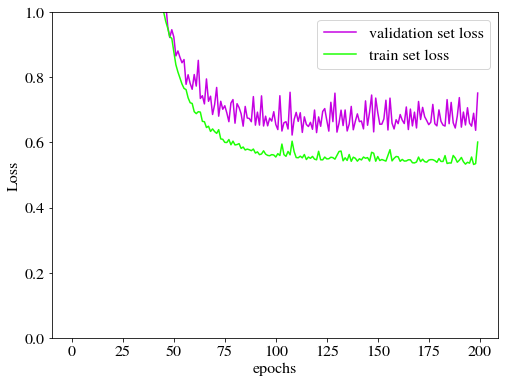

In [94]:

plt.plot( myhistory.history['val_loss'],label='validation set loss')
plt.plot(  myhistory.history['loss'],label='train set loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)

(0.4, 1.0)

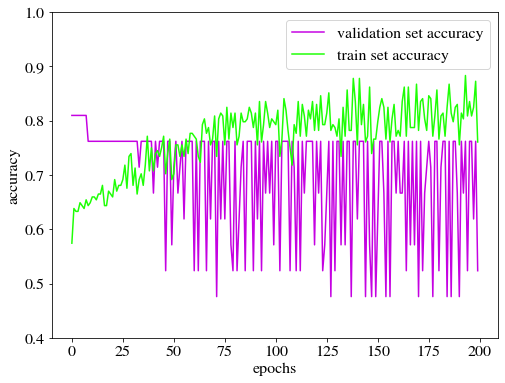

In [95]:
plt.plot(myhistory.history['val_accuracy'],label='validation set accuracy')
plt.plot( myhistory.history['accuracy'],label='train set accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.ylim(0.4, 1)

## Evaluando el modelo

In [96]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6310 - accuracy: 0.7800


[0.6309964060783386, 0.7799999713897705]

In [56]:
model.metrics_names

['loss', 'accuracy']

Con el modelo planteado se alcanza un accuracy de 78%